In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['clump-thickness','uniformityofcellsize','uniformityofcellshape','marginaladhesion','singleepthileialcellsize','barenuclei','blandchromatin','normalnucleoli','mitoses','class']

In [3]:
dataset = read_csv(url, names=names)
print(dataset.shape)
dataset.head()

(699, 10)


,clump-thickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepthileialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
missingvalues = ['?']
dataset = read_csv(url, names=names,usecols=[1,2,3,4,5,6,7,8,9,10],na_values=missingvalues)
print(dataset.shape)
dataset.head()

(699, 10)


,clump-thickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepthileialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [5]:
dataset.dropna(axis=0,how='any',inplace=True)
print(dataset.shape)
dataset.head()

(683, 10)


,clump-thickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepthileialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [6]:
#changelastcolumn
dataset = dataset.astype({'class':str})
print(dataset.shape)
dataset.head()

(683, 10)


,clump-thickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepthileialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [7]:
# descriptions
print(dataset.describe())

       clump-thickness  uniformityofcellsize  uniformityofcellshape  \
count       683.000000            683.000000             683.000000   
mean          4.442167              3.150805               3.215227   
std           2.820761              3.065145               2.988581   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       marginaladhesion  singleepthileialcellsize  barenuclei  blandchromatin  \
count        683.000000                683.000000  683.000000      683.000000   
mean           2.830161                  3.234261    3.544656        3.445095   
std            2.864562                  2.223085    3.643857        2.449697   
min            1.000000             

In [8]:

# class distribution
print(dataset.groupby('class').size())

class
2    444
4    239
dtype: int64


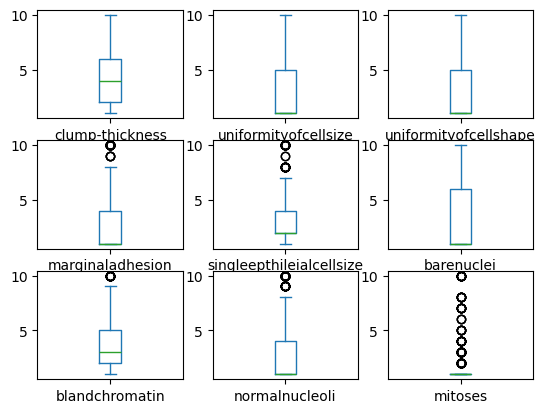

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

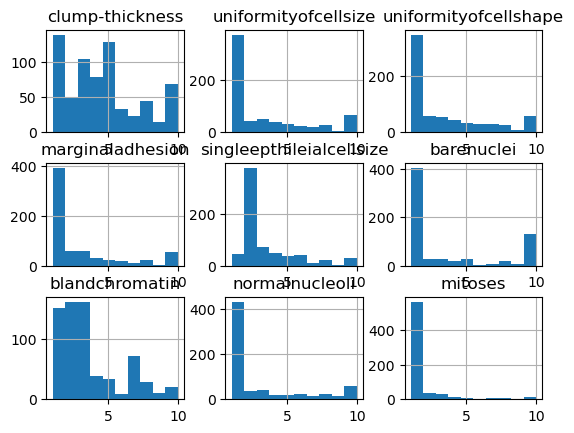

In [10]:
# histograms
dataset.hist()
pyplot.show()

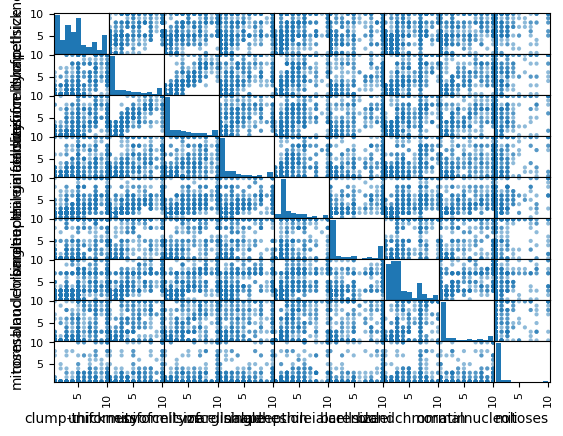

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
y = array[:,9]


In [13]:
#from sklearn.feature_selection import SelectKBest
#rom sklearn.feature_selection import f_classif
#X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
#print(X_new.shape)
#X = X_new

In [14]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [15]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.957845 (0.011806)
LDA: 0.956061 (0.014525)
KNN: 0.965152 (0.019240)
CART: 0.921279 (0.028261)
NB: 0.950539 (0.028432)
SVM: 0.948754 (0.028067)


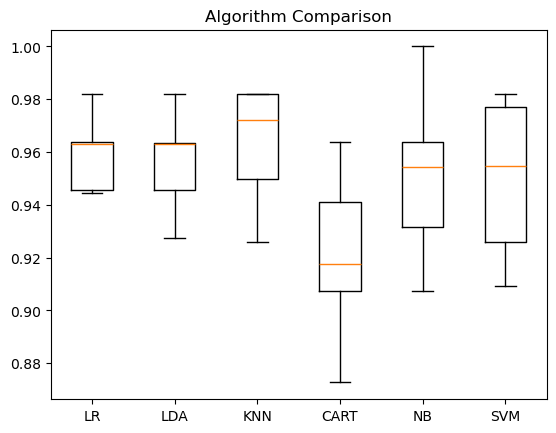

In [16]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [17]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [18]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9927007299270073
[[90  0]
 [ 1 46]]
              precision    recall  f1-score   support

           2       0.99      1.00      0.99        90
           4       1.00      0.98      0.99        47

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

